In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("ford.csv")
# pd.set_option("display.max_rows",None)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


### About Dataset
#### Attribute Information:
1. **model** - > Ford Car Brands
2. **year** - >Production Year
3. **price** - >Price of car in Dollars 
4. **transmission** - > Automatic,Manual, Semi-Auto
5. **mileage** -> Number of miles traveled
6. **fuel_Type** -> Petrol,Diesel,Hybrid,Electric,Other
7. **tax** -> Annual Tax
8. **mpg** - > Miles per Gallon
9. **engineSize** - > Car's Engine Size

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [4]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [5]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
df["model"].unique() # space before spellings , # "Focus" repeating twice

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

In [7]:
df["model"] = df["model"].replace({"Focus":" Focus"})

In [8]:
df["model"].value_counts()  # Nominal

model
 Fiesta                   6557
 Focus                    4589
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Name: count, dtype: int64

In [9]:
df["year"].unique()  # categorical

array([2017, 2018, 2019, 2015, 2014, 2016, 2013, 2020, 2012, 2008, 2010,
       2009, 2011, 1998, 2007, 2005, 2006, 2002, 2003, 1996, 2004, 2000,
       2060], dtype=int64)

In [10]:
df["year"].value_counts()  # 2060

year
2017    4888
2018    4014
2019    3194
2016    2331
2015    1368
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
2060       1
Name: count, dtype: int64

In [11]:
df[df["year"]==2060] # replace 

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17726,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4


In [12]:
df["price"].unique()

array([12000, 14000, 13000, ..., 12849, 16249, 18122], dtype=int64)

In [13]:
df["price"].nunique() # continous

3511

In [14]:
df["transmission"].unique() # categorical

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [15]:
df["transmission"].value_counts()

transmission
Manual       15518
Automatic     1361
Semi-Auto     1087
Name: count, dtype: int64

In [16]:
df["mileage"].nunique() # continous

13528

In [17]:
df["fuelType"].unique() # Other in the sense CNG or LPG or Biofuel

array(['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other'], dtype=object)

In [18]:
df["fuelType"].value_counts() # categorical

fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

In [19]:
df[df['fuelType']=='Other']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17492,Mondeo,2015,13800,Automatic,19470,Other,0,67.3,2.0


In [20]:
df['tax'].unique() # continous

array([150, 145,   0,  20, 160, 125,  30, 235, 240, 200, 165, 140, 570,
       205, 260, 580, 135, 265, 300, 195, 120, 555, 325, 155, 270, 115,
       110, 190, 210, 185, 330, 230, 220, 305, 290,  22], dtype=int64)

In [21]:
df['tax'].value_counts()

tax
145    8944
0      2153
150    1944
125    1407
30     1236
20     1210
160     358
200     252
235     123
165     113
205      60
260      41
240      32
265      15
300      11
135      10
140       8
570       6
195       6
325       6
555       4
115       3
155       3
220       3
330       2
305       2
230       2
580       2
190       2
120       2
210       1
185       1
110       1
270       1
290       1
22        1
Name: count, dtype: int64

In [22]:
df["mpg"].unique()  # continous

array([ 57.7,  40.3,  48.7,  47.9,  50.4,  54.3,  42.2,  61.4,  56.5,
        65.7,  58.9,  64.2,  38.2,  62.8,  55.4,  41.5,  68.9,  78.5,
        60.1,  53.3,  39.2,  74.3,  43.5,  31.7,  57.6,  44.1,  49.6,
        76.4,  34.4,  44.8,  36.7,  67.3,  52.3,  51.4,  70.6,  46.3,
        45.6,  31. ,  74.4,  80.7,  47.1,  22.1,  30.7,  28.8,  23.5,
        56.6,  40.9,  29.1,  38.7,  22.6,  42.8,  30.1,  20.9,  88.3,
        34.5,  37.2,  35.3,  83.1,  37.7,  35.8,  40.4,  85.6,  32.5,
        20.8, 201.8,  34. ,  39.8,  24.8,  33.6,  32.8,  29.4,  31.4,
        22.8,  23.7,  32.1,  43.4,  34.9,  28.3,  27.4,  76.3,  30.4,
        36.2,  69. ,  26.3,  37.1,  28. ,  42.1,  54.2,  28.5,  23.9])

In [23]:
df['mpg'].value_counts()

mpg
65.7    2528
54.3    1774
60.1    1674
64.2     995
57.7     962
        ... 
37.1       1
28.0       1
54.2       1
28.5       1
23.9       1
Name: count, Length: 90, dtype: int64

In [24]:
df["engineSize"].unique()

array([1. , 1.5, 1.6, 1.2, 2. , 1.1, 2.3, 1.4, 5. , 2.2, 2.5, 1.8, 1.3,
       3.2, 0. , 1.7])

In [25]:
df["engineSize"].value_counts()  # continous

engineSize
1.0    7765
1.5    3418
2.0    3311
1.2    1626
1.6     923
1.1     559
1.4     112
2.3      80
0.0      51
5.0      45
1.8      35
2.2      13
2.5      13
1.3      13
3.2       1
1.7       1
Name: count, dtype: int64

In [26]:
df[df["engineSize"]==0.0] 

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13862,Kuga,2019,18990,Manual,8389,Petrol,150,35.3,0.0
14064,Focus,2016,15500,Manual,28344,Diesel,20,67.3,0.0
14082,Focus,2015,14300,Manual,40457,Diesel,20,67.3,0.0
15343,KA,2018,10000,Manual,10051,Petrol,150,43.5,0.0
15500,EcoSport,2015,8500,Manual,33403,Diesel,30,61.4,0.0
15775,Focus,2017,13000,Manual,24484,Diesel,145,70.6,0.0
16312,Focus,2015,9170,Manual,28000,Petrol,20,61.4,0.0
16313,Focus,2019,18699,Manual,10000,Petrol,145,46.3,0.0
16321,Fiesta,2017,9899,Manual,10000,Petrol,0,65.7,0.0
16322,Ka+,2018,9999,Manual,15000,Petrol,145,43.5,0.0


####  Data Visualization

Data Types in our dataset:

1. Categorical features:

- **Nominal** : model, transmission and fuelType.
- **Ordinal** : -

2. Numerical Features:

- **Continueous** : price, mileage, tax, mpg and engineSize.
- **Discrete** : year

In [27]:
continous = ['mileage','tax','mpg','engineSize']
discrete = ['model','year','transmission','fuelType']

## Exploratoy Data Analysis 
#### For continous variables

In [28]:
df[continous].describe()

,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000
mean,23362.608761,113.329456,57.906980,1.350807
std,19472.054349,62.012456,10.125696,0.432367
min,1.000000,0.000000,20.800000,0.000000
25%,9987.000000,30.000000,52.300000,1.000000
50%,18242.500000,145.000000,58.900000,1.200000
75%,31060.000000,145.000000,65.700000,1.500000
max,177644.000000,580.000000,201.800000,5.000000


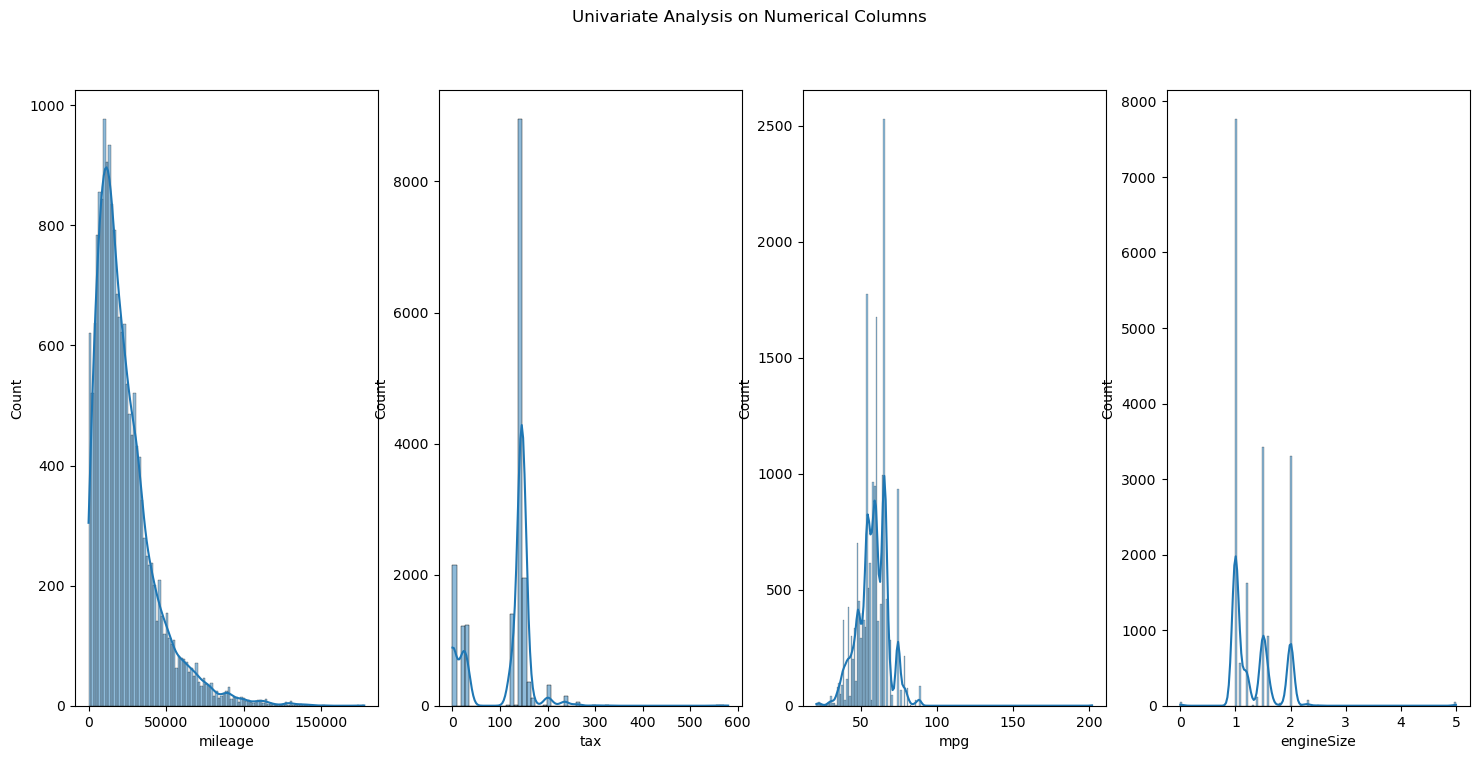

In [29]:
plt.rcParams["figure.figsize"] = (18,8)

plt.subplot(1,4,1)
sns.histplot(df["mileage"],kde=True)

plt.subplot(1,4,2)
sns.histplot(df["tax"],kde=True)

plt.subplot(1,4,3)
sns.histplot(df["mpg"],kde=True)

plt.subplot(1,4,4)
sns.histplot(df["engineSize"],kde=True)

plt.suptitle("Univariate Analysis on Numerical Columns")
plt.show()

In [30]:
df[continous].skew()  # skewness

mileage       1.842068
tax          -0.564082
mpg           0.603923
engineSize    1.893121
dtype: float64

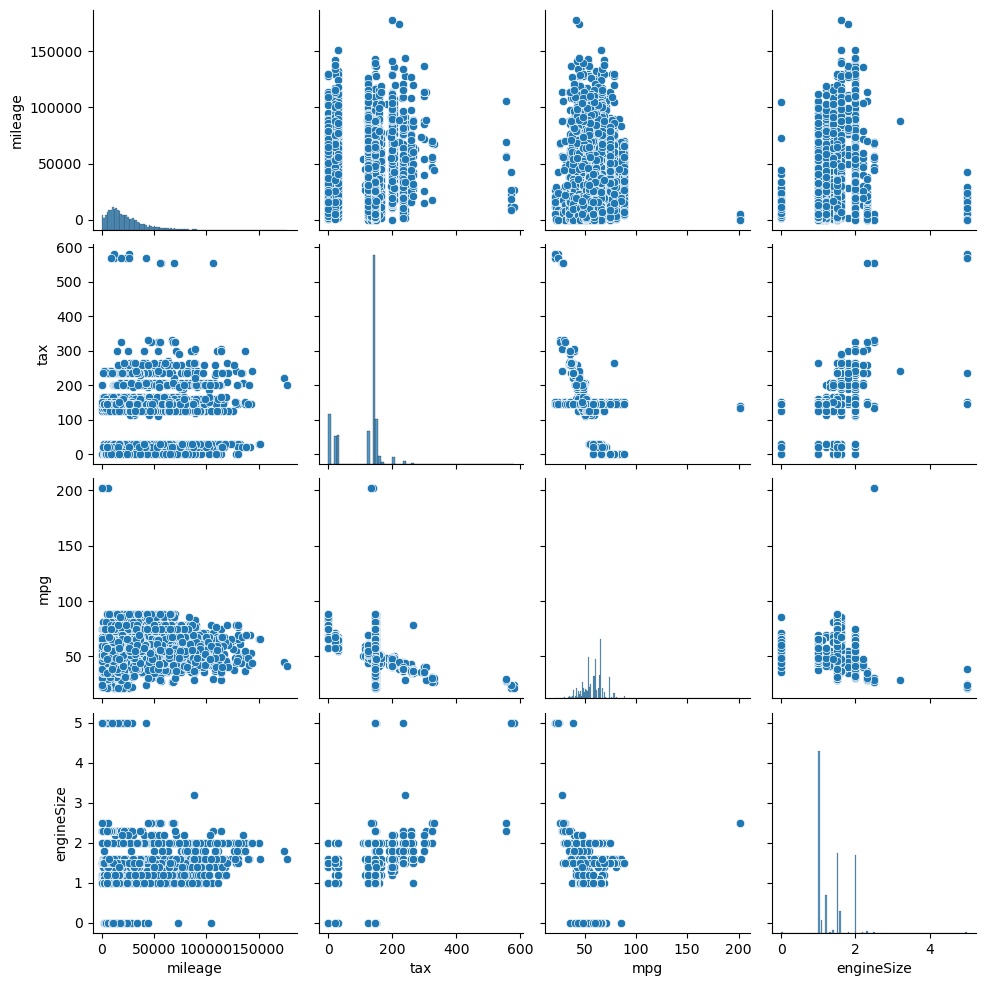

In [31]:
sns.pairplot(df[continous])
plt.show()

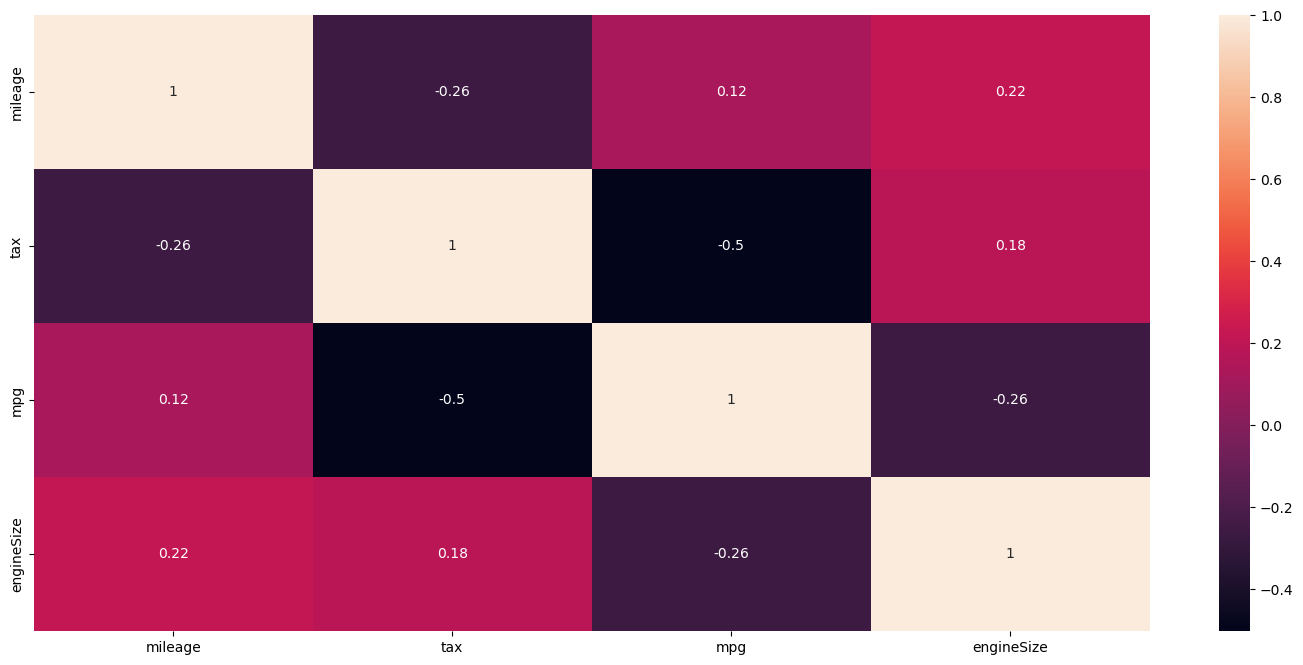

In [32]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(), annot = True)
plt.show()

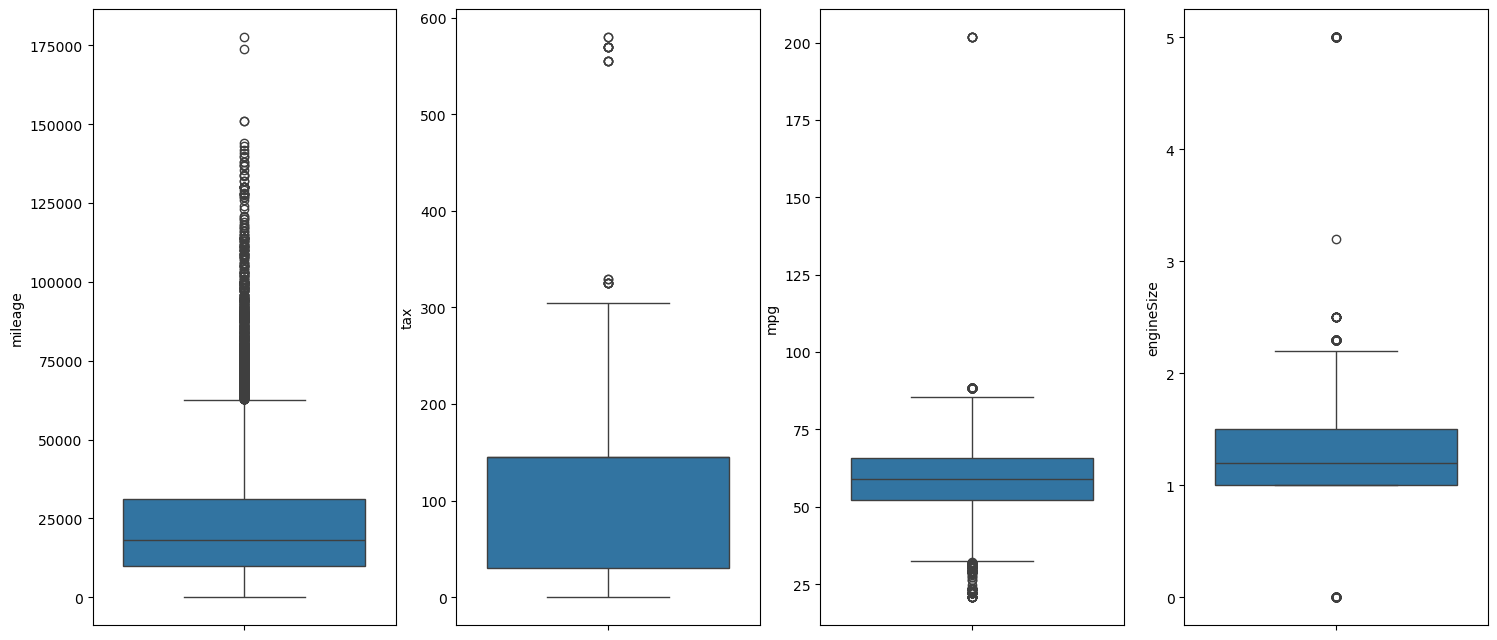

In [33]:
# Visualization on Outliers using Box plot

plt.figure(figsize=(18,8))

plt.subplot(1,4,1)
sns.boxplot(df['mileage'])

plt.subplot(1,4,2)
sns.boxplot(df['tax'])

plt.subplot(1,4,3)
sns.boxplot(df['mpg'])

plt.subplot(1,4,4)
sns.boxplot(df['engineSize'])

plt.show()

#### For Discrete Variables

In [34]:
df[discrete].describe(include="object")

,model,transmission,fuelType
count,17966,17966,17966
unique,23,3,5
top,Fiesta,Manual,Petrol
freq,6557,15518,12179


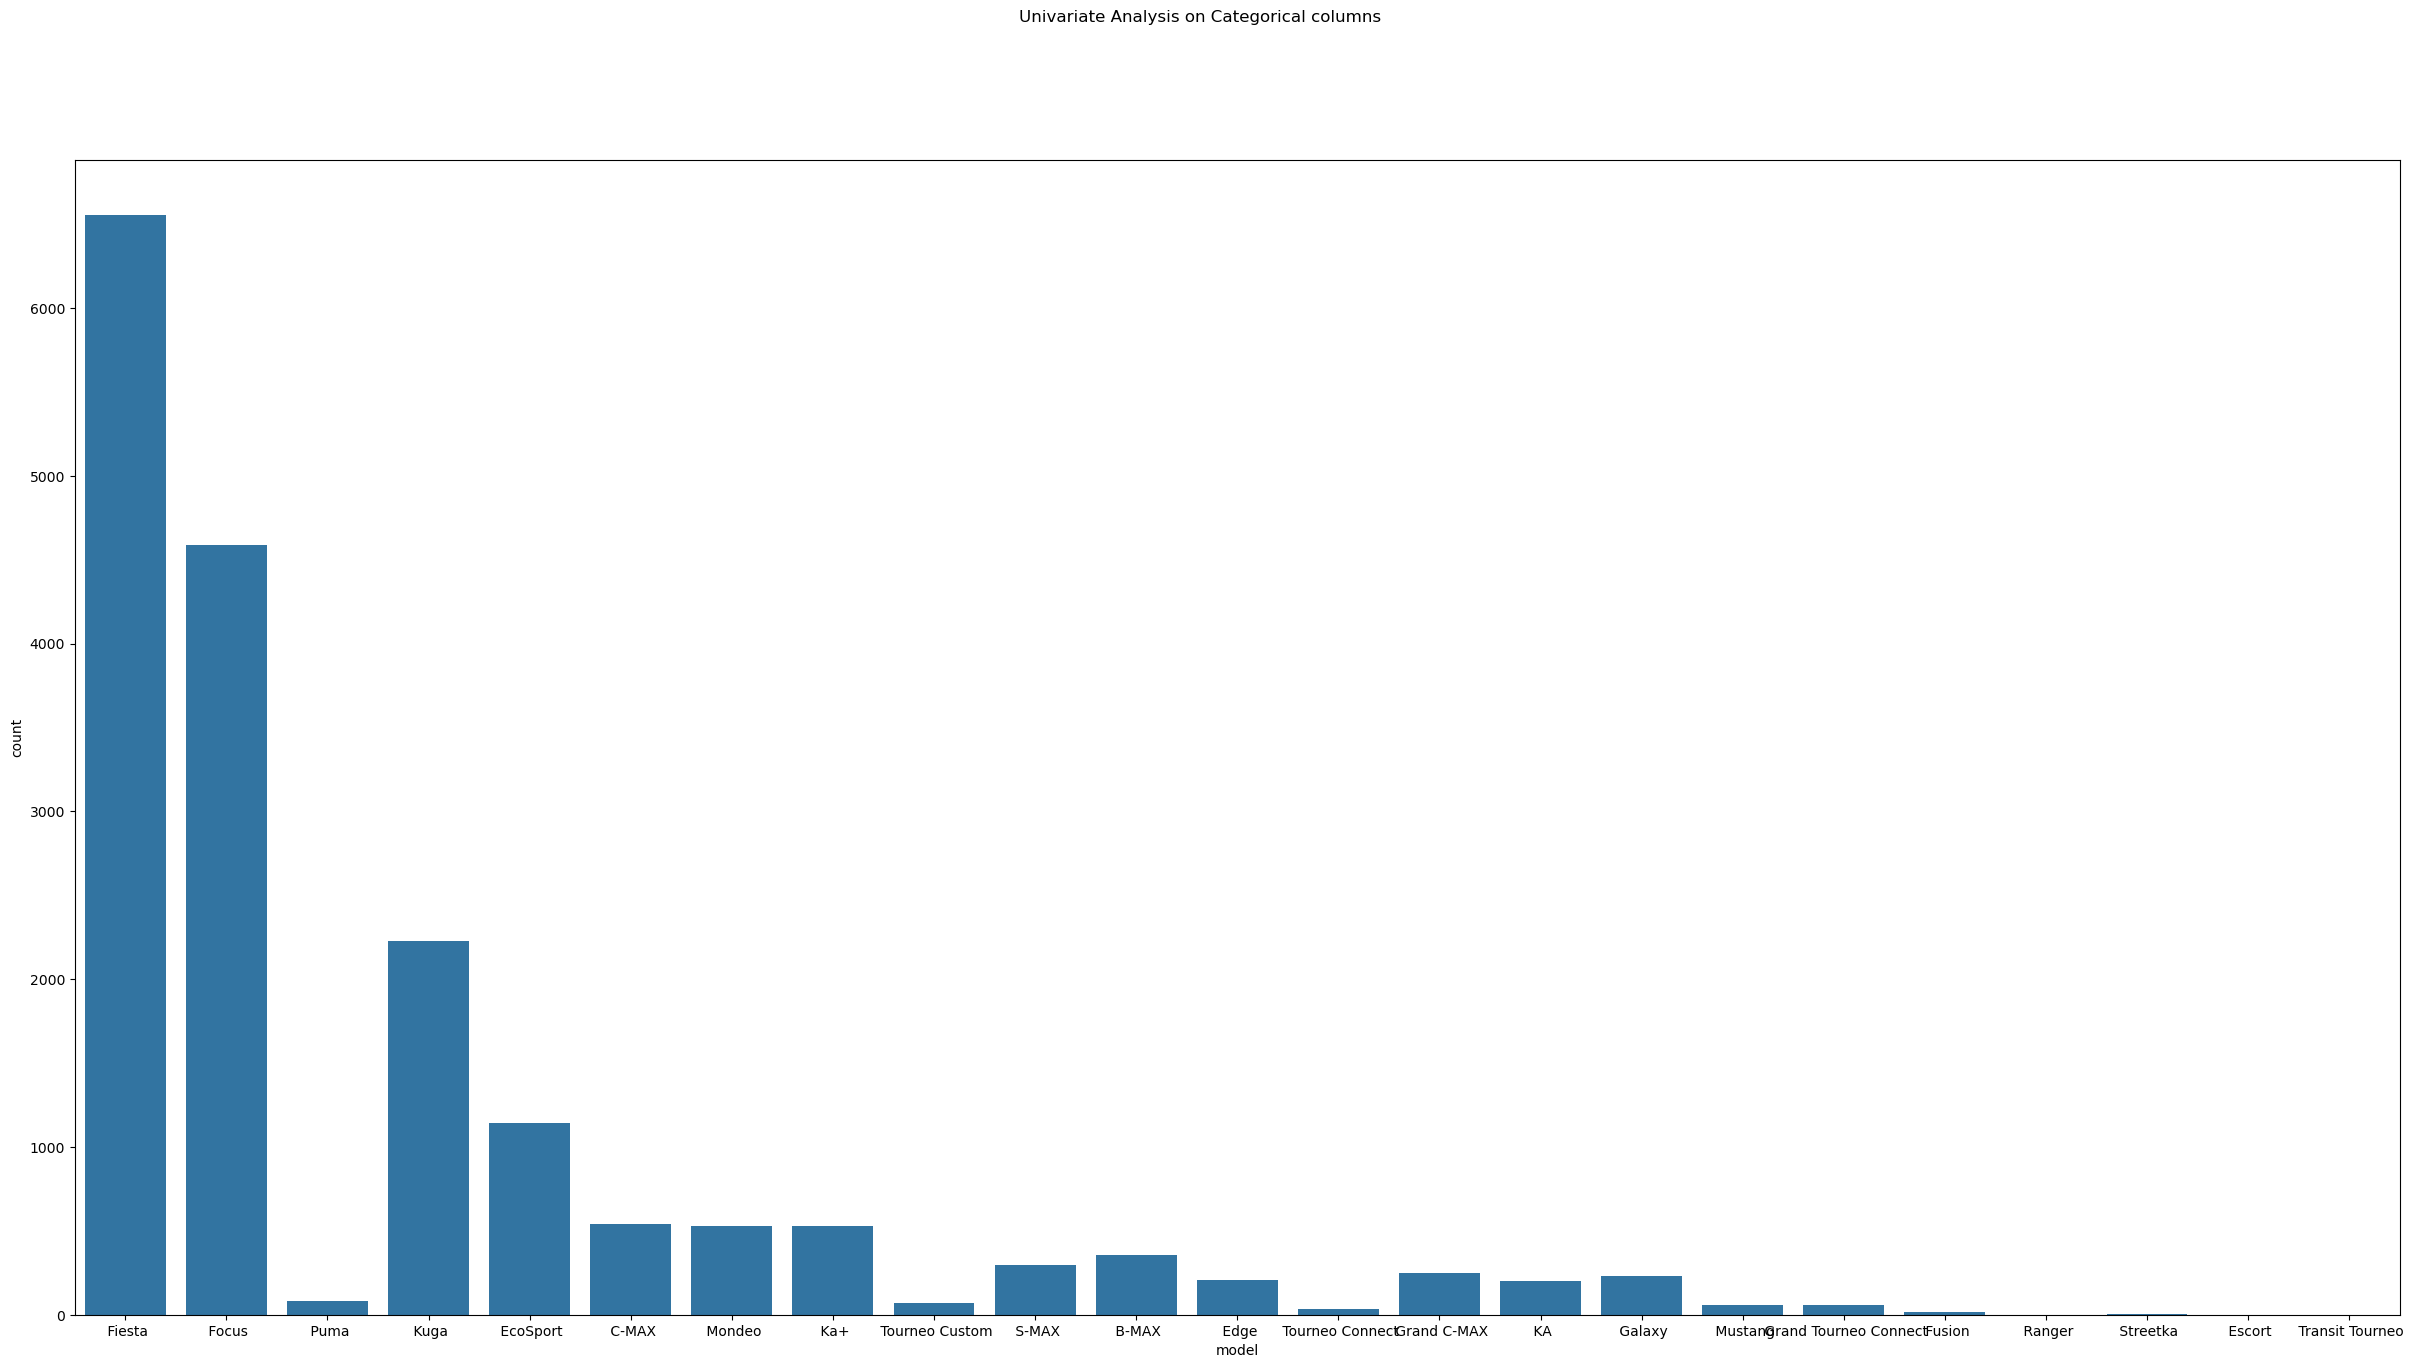

In [35]:
plt.rcParams["figure.figsize"]= (30,15)

plt.subplot(1,1,1)
sns.countplot(x=df["model"])

plt.suptitle("Univariate Analysis on Categorical columns")
plt.show()

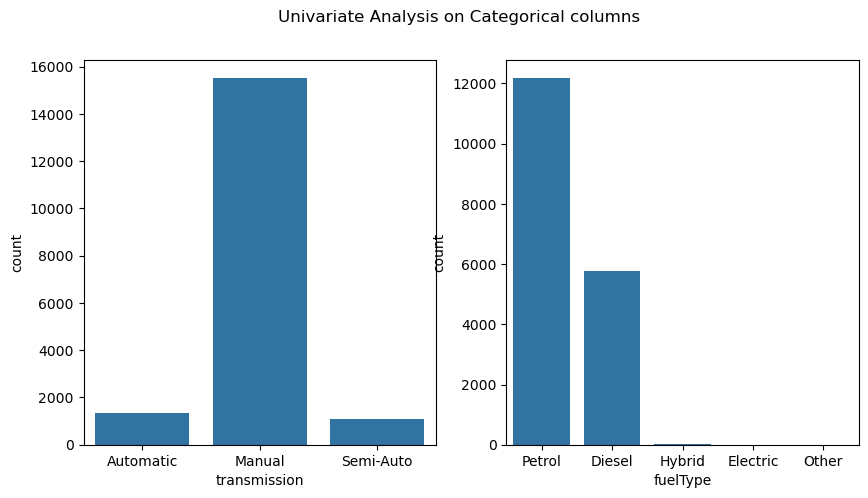

In [36]:
plt.rcParams["figure.figsize"]= (10,5)

plt.subplot(1,2,1)
sns.countplot(x=df["transmission"])

plt.subplot(1,2,2)
sns.countplot(x=df["fuelType"])

plt.suptitle("Univariate Analysis on Categorical columns")
plt.show()

## Data Preparation

#### Removing Duplicates

In [37]:
df.duplicated().sum()

154

In [38]:
df.drop_duplicates(inplace=True)

In [39]:
df.duplicated().sum()

0

#### Modifying the wrong data

df["model"].replace({' Fiesta':'Fiesta'},inplace=True)
df["model"].replace({' Focus':'Focus'},inplace=True)
df["model"].replace({' Puma':'Puma'},inplace=True)
df["model"].replace({' Kuga':'Kuga'},inplace=True)
df["model"].replace({' EcoSport':'EcoSport'},inplace=True)
df["model"].replace({' C-MAX':'C-MAX'},inplace=True)
df["model"].replace({' Mondeo':'Mondeo'},inplace=True)
df["model"].replace({' Ka+':'Ka+'},inplace=True)
df["model"].replace({' Tourneo Custom':'Tourneo Custom'},inplace=True)
df["model"].replace({' S-MAX':'S-MAX'},inplace=True)
df["model"].replace({' B-MAX':'B-MAX'},inplace=True)
df["model"].replace({' Edge':'Edge'},inplace=True)
df["model"].replace({' Tourneo Connect':'Tourneo Connect'},inplace=True)
df["model"].replace({' Grand C-MAX':'Grand C-MAX'},inplace=True)
df["model"].replace({' KA':'KA'},inplace=True)
df["model"].replace({' Galaxy':'Galaxy'},inplace=True)
df["model"].replace({' Mustang':'Mustang'},inplace=True)
df["model"].replace({' Grand Tourneo Connect':'Grand Tourneo Connect'},inplace=True)
df["model"].replace({' Fusion':'Fusion'},inplace=True)
df["model"].replace({' Ranger':'Ranger'},inplace=True)
df["model"].replace({' Streetka':'Streetka'},inplace=True)
df["model"].replace({' Escort':'Escort'},inplace=True)
df["model"].replace({' Transit Tourneo':'Transit Tourneo'},inplace=True)

In [40]:
df["year"].replace({'2060':'2012'},inplace=True)
df["fuelType"].replace({'Other':'Hybrid'},inplace=True) # CNG,LPG and Biofuel can also be called as "Hybrid"

In [41]:
# Filter the DataFrame by model
df_focus = df[df["model"] == " Focus"]
df_KA = df[df["model"] == " KA"]
df_EcoSport = df[df["model"] == " EcoSport"]
df_Fiesta = df[df["model"] == " Fiesta"]
df_Ka = df[df["model"] == " Ka+"]
df_Mondeo = df[df["model"]== " Mondeo"]
df_Puma = df[df["model"] == " Puma"]

# Calculate the mode of the engineSize column
mode_engineSize1 = df_focus["engineSize"].mode()
mode_engineSize2 = df_KA["engineSize"].mode()
mode_engineSize3 = df_EcoSport["engineSize"].mode()
mode_engineSize4 = df_Fiesta["engineSize"].mode()
mode_engineSize5 = df_Ka["engineSize"].mode()
mode_engineSize6 = df_Mondeo["engineSize"].mode()
mode_engineSize7 = df_Puma["engineSize"].mode()

# Print the mode
print("Focus",mode_engineSize1)
print("KA",mode_engineSize2)
print("EcoSport",mode_engineSize3)
print("Fiesta",mode_engineSize4)
print("Ka+",mode_engineSize5)
print("Mondeo",mode_engineSize6)
print("Puma",mode_engineSize7)

Focus 0    1.0
Name: engineSize, dtype: float64
KA 0    1.2
Name: engineSize, dtype: float64
EcoSport 0    1.0
Name: engineSize, dtype: float64
Fiesta 0    1.0
Name: engineSize, dtype: float64
Ka+ 0    1.2
Name: engineSize, dtype: float64
Mondeo 0    2.0
Name: engineSize, dtype: float64
Puma 0    1.0
Name: engineSize, dtype: float64


In [42]:
df.loc [(df['model']==" Kuga") & (df['engineSize']==0.0), 'engineSize'] = 1.5
df.loc [(df['model']==" Focus") & (df['engineSize']==0.0), 'engineSize'] = 1.0
df.loc [(df['model']==" KA") & (df['engineSize']==0.0), 'engineSize'] = 1.2
df.loc [(df['model']==" EcoSport") & (df['engineSize']==0.0), 'engineSize'] = 1.0
df.loc [(df['model']==" Fiesta") & (df['engineSize']==0.0), 'engineSize'] = 1.0
df.loc [(df['model']==" Ka+") & (df['engineSize']==0.0), 'engineSize'] = 1.2
df.loc [(df['model']==" Mondeo") & (df['engineSize']==0.0), 'engineSize'] = 2.0
df.loc [(df['model']==" Puma") & (df['engineSize']==0.0), 'engineSize'] = 1.0

In [43]:
df[df["engineSize"]==0.0].shape

(0, 9)

#### Transformations

In [44]:
df['mileage']=df['mileage']**(1/2)
df['mileage'].skew()

0.4797996459839898

In [45]:
df['engineSize']=df['engineSize']**(1/4)
df['engineSize'].skew()

0.8756402955512836

In [46]:
df[continous].skew()

mileage       0.479800
tax          -0.560559
mpg           0.608008
engineSize    0.875640
dtype: float64

#### Encoding

In [47]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df["model"]=oe.fit_transform(df[["model"]])
df["transmission"] = oe.fit_transform(df[["transmission"]])
df["fuelType"] = oe.fit_transform(df[["fuelType"]])
df["year"] = oe.fit_transform(df[["year"]])
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5.0,18.0,12000,0.0,126.269553,3.0,150,57.7,1.000000
1,6.0,19.0,14000,1.0,95.304774,3.0,150,57.7,1.000000
2,6.0,18.0,13000,1.0,111.606451,3.0,150,57.7,1.000000
3,5.0,20.0,17500,1.0,102.274141,3.0,145,40.3,1.106682
4,5.0,20.0,16500,0.0,38.496753,3.0,145,48.7,1.000000
...,...,...,...,...,...,...,...,...,...
17961,0.0,18.0,8999,1.0,129.228480,3.0,150,47.1,1.087757
17962,0.0,15.0,7499,1.0,201.742410,3.0,30,57.7,1.000000
17963,6.0,16.0,9999,1.0,83.725743,0.0,20,67.3,1.124683
17964,11.0,19.0,8299,1.0,70.760158,3.0,145,57.7,1.046635


#### Train-Test Split

In [48]:
X = df.drop(columns=['price'],axis=1)
y = df['price']

#### Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train and X_test are your training and test datasets
sc = MinMaxScaler()

# Fit and transform the training data
X_scaled= sc.fit_transform(X)

In [50]:
Train = []
Test = []
CV = []

for i in range(0,100):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,train_size=0.8,random_state=i)
    
    from sklearn.linear_model import LinearRegression
    lr_default = LinearRegression()
    lr_default.fit(X_train,y_train)
    
    ypred_train = lr_default.predict(X_train)
    ypred_test = lr_default.predict(X_test)
    
    from sklearn.metrics import r2_score
    Train.append(r2_score(y_train,ypred_train))
    Test.append(r2_score(y_test,ypred_test))
    
    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(lr_default,X_train,y_train,cv=5).mean())
    
em = pd.DataFrame({"Train":Train,"Test":Test,"CV":CV})
gm = em[(abs(em['Train']-em['Test'])<=0.05) & (abs(em['Test']-em['CV'])<=0.05)]
rs = gm[gm["CV"]==gm["CV"].max()].index.to_list()[0]
print("Best Random State Number:",rs)

Best Random State Number: 94


In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,train_size=0.8,random_state=rs)

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

print("Train R2:",r2_score(y_train,ypred_train))
print("CV Score:",cross_val_score(model,X_train,y_train,cv=5).mean())
print("Test R2:",r2_score(y_test,ypred_test))

Train R2: 0.7502258265220247
CV Score: 0.7491472112820875
Test R2: 0.7055692574915169


**Check for Assumption**

In [53]:
error = y_test - ypred_test

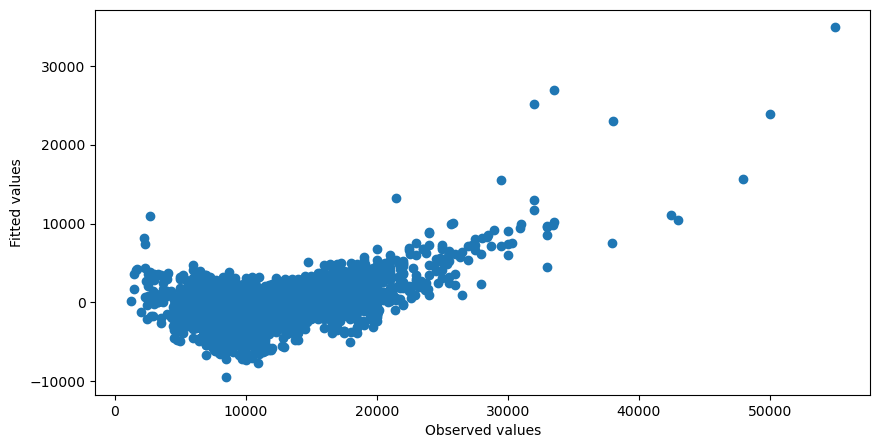

In [54]:
plt.scatter(y_test,error)
plt.xlabel("Observed values")
plt.ylabel("Fitted values")
plt.show()

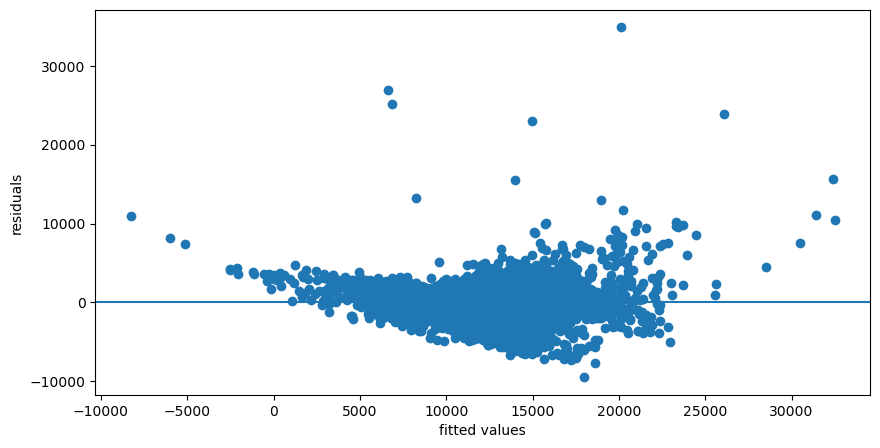

In [55]:
plt.scatter(ypred_test,error)
plt.axhline(0)
plt.xlabel("fitted values")
plt.ylabel('residuals')
plt.show()

In [56]:
error.skew()

1.952991370917009

In [57]:
import statsmodels.formula.api as smf
model1 = smf.ols("y~X",data=df).fit() 
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     6374.
Date:                Sat, 17 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:29:50   Log-Likelihood:            -1.6398e+05
No. Observations:               17812   AIC:                         3.280e+05
Df Residuals:                   17803   BIC:                         3.280e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.56e+04    716.717    -35.716      0.000    -2.7e+04   -2.42e+04
X[0]          29.2434      5.425      5.390      0.000      18.610      39.877
X[1]        1204.1197     13.513     89.110      0.000    1177.633    1230.606
X[2]        -204.8045     49.129     -4.169      0.000    -301.103    -108.506
X[3]         -22.0084      0.455    -48.367      0.000     -22.900     -21.117
X[4]        -320.4830     25.485    -12.575      0.000    -370.437    -270.529
X[5]          -0.0840      0.363     -0.232      0.817      -0.795       0.627
X[6]        -101.1815      2.733    -37.026      0.000    -106.538     -95.825
X[7]        2.428e+04    468.073     51.866      0.000    2.34e+04    2.52e+04
==============================================================================
Omnibus:                     4224.909   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52059.816
Skew:                           0.791   Prob(JB):                         0.00
Kurtosis:                      11.225   Cond. No.                     9.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

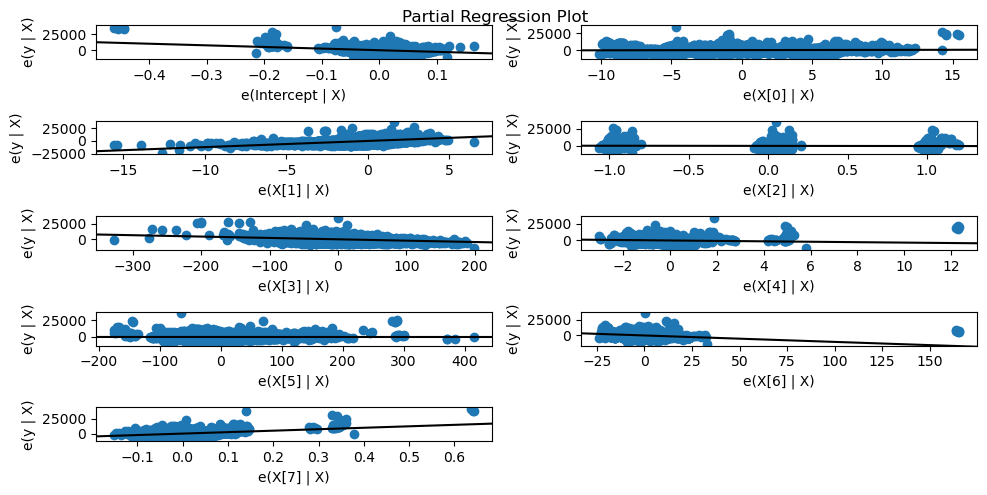

In [58]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)
plt.show()

In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly_con = PolynomialFeatures(degree=2)
X_train_poly = pd.DataFrame(poly_con.fit_transform(X_train))
X_test_poly = pd.DataFrame(poly_con.transform(X_test))

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly,y_train)

ypred_train = model.predict(X_train_poly)
ypred_test = model.predict(X_test_poly)

print("Train r2:",r2_score(y_train,ypred_train))
print("CV:",cross_val_score(model,X_train_poly,y_train,cv=5).mean())
print("Test r2:",r2_score(y_test,ypred_test))

Train r2: 0.8276719983603771
CV: 0.8242985042407962
Test r2: 0.8083805780946045


In [60]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
estimator = Lasso()

param_grid = {"alpha":list(range(0,10))}

model_hp = GridSearchCV(estimator,param_grid,cv=5,scoring="r2")

model_hp.fit(X_train,y_train)
model_hp.best_params_
lasso_best = Lasso(alpha=1)
lasso_best.fit(X_train,y_train)

print("Intercept:",lasso_best.intercept_)
print("coefficeint:",lasso_best.coef_)

ypred_train = lasso_best.predict(X_train)
ypred_test = lasso_best.predict(X_test)

print("Train R2:",r2_score(y_train,ypred_train))
print("CV Score:",cross_val_score(lasso_best,X_train,y_train,cv=5).mean())
print("Test R2:",r2_score(y_test,ypred_test))

Intercept: -3041.865937329336
coefficeint: [   592.25963041  26202.9024761    -314.40468673  -9156.33041525
  -1048.48387444     -0.         -18956.85122598  11633.82969314]
Train R2: 0.7501891626343046
CV Score: 0.7491618561851552
Test R2: 0.7058206358608192


In [61]:
model_hp.best_params_

{'alpha': 1}

In [62]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge
estimator = Ridge()

param_grid = {"alpha":list(range(1,10))}

model_hp = GridSearchCV(estimator,param_grid,cv=5,scoring="r2")

model_hp.fit(X_train,y_train)
model_hp.best_params_

{'alpha': 1}

In [63]:
ridge_best = Ridge(alpha=1)
ridge_best.fit(X_train,y_train)

ypred_train = ridge_best.predict(X_train)
ypred_test = ridge_best.predict(X_test)

print("Train R2:",r2_score(y_train,ypred_train))
print("CV Score:",cross_val_score(ridge_best,X_train,y_train,cv=5).mean())
print("Test R2:",r2_score(y_test,ypred_test))

Train R2: 0.7501390272560958
CV Score: 0.7490665027971035
Test R2: 0.7059880390741425


In [64]:
from sklearn.model_selection import GridSearchCV

# model 
from sklearn.linear_model import ElasticNet
estimator = ElasticNet()

# parameters and values
param_grid = {"alpha":[0.1,0.2,1,2],"l1_ratio":[0,0.9,1.0]}

# model with best hyperparameters
model_hp = GridSearchCV(estimator,param_grid,cv=5,scoring="r2")

model_hp.fit(X_train,y_train)
model_hp.best_params_

{'alpha': 1, 'l1_ratio': 1.0}

In [65]:
enr_best = ElasticNet(alpha=10,l1_ratio=1.0)
enr_best.fit(X_train,y_train)

ypred_train = enr_best.predict(X_train)
ypred_test = enr_best.predict(X_test)

print("Train R2:",r2_score(y_train,ypred_train))
print("CV Score:",cross_val_score(enr_best,X_train,y_train,cv=5).mean())
print("Test R2:",r2_score(y_test,ypred_test))

Train R2: 0.7475396546825721
CV Score: 0.7465641809283643
Test R2: 0.7049798924424556


In [73]:
from sklearn.neighbors import KNeighborsRegressor 
estimator = KNeighborsRegressor() 

param_grid = {"n_neighbors":list(range(1,10))}

from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator,param_grid,scoring="r2",cv=5) 
knn_grid.fit(X_train,y_train)

knn_model = knn_grid.best_estimator_

ypred_train = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score 
print("Train MSE :", mean_squared_error(y_train,ypred_train))
print("Train R2 :", r2_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(knn_model,X_train,y_train,cv=5,scoring="r2").mean()) 
print("Test MSE :", mean_squared_error(y_test,ypred_test)) 
print("Test R2 :", r2_score(y_test,ypred_test)) 

Train MSE : 1012152.9420704962
Train R2 : 0.9546213698985763
Cross Validation Score : 0.9194677972490245
Test MSE : 2215833.7608230426
Test R2 : 0.9033849752382189


In [74]:
knn_model

KNeighborsRegressor(n_neighbors=4)

In [75]:
from sklearn.ensemble import AdaBoostRegressor 
estimator = AdaBoostRegressor(random_state=rs)

param_grid = {"n_estimators":list(range(1,11))}

from sklearn.model_selection import GridSearchCV
ab_grid = GridSearchCV(estimator,param_grid,scoring="r2",cv=5) 
ab_grid.fit(X_train,y_train)

ab = ab_grid.best_estimator_
ab_fi = ab.feature_importances_

index = [i for i,x in enumerate(ab_fi) if x>0]

import pandas as pd
X_train = pd.DataFrame(X_train) # convert array to dataframe
X_test = pd.DataFrame(X_test)

X_train_ab = X_train.iloc[:,index] # use iloc on dataframe
X_test_ab = X_test.iloc[:,index]


ab.fit(X_train_ab,y_train)

ypred_train = ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)

from sklearn.metrics import mean_squared_error, r2_score 
print("Train MSE :", mean_squared_error(y_train,ypred_train)) 
print("Train R2 :", r2_score(y_train,ypred_train)) 
print("Cross Validation Score :",cross_val_score(ab,X_train_ab,y_train,cv=5,scoring="r2").mean()) # changed
print("Test MSE :", mean_squared_error(y_test,ypred_test)) 
print("Test R2 :", r2_score(y_test,ypred_test)) 

Train MSE : 5792008.694305034
Train R2 : 0.7403224264255586
Cross Validation Score : 0.735599972590297
Test MSE : 6702189.806777751
Test R2 : 0.7077703907266619


In [76]:
ab_fi

array([5.42079638e-02, 3.44977288e-01, 2.28339112e-03, 1.14911788e-01,
       0.00000000e+00, 3.74858618e-05, 1.49567657e-01, 3.34014427e-01])

In [77]:
ab

AdaBoostRegressor(n_estimators=10, random_state=94)

In [78]:
from sklearn.ensemble import GradientBoostingRegressor 
estimator = GradientBoostingRegressor(random_state=rs) 

param_grid = {"n_estimators":list(range(1,10)),"learning_rate":[0.7,0.8,0.9,1]}

from sklearn.model_selection import GridSearchCV
gb_grid = GridSearchCV(estimator,param_grid,scoring="r2",cv=5) 
gb_grid.fit(X_train,y_train)

gb = gb_grid.best_estimator_
gb_fi = gb.feature_importances_

index = [i for i,x in enumerate(gb_fi) if x>0]

import pandas as pd
X_train = pd.DataFrame(X_train) # convert array to dataframe
X_test = pd.DataFrame(X_test)

X_train_gb = X_train.iloc[:,index]
X_test_gb = X_test.iloc[:,index]

gb.fit(X_train_gb,y_train)

ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)

from sklearn.metrics import mean_squared_error, r2_score 
print("Train MSE :", mean_squared_error(y_train,ypred_train)) 
print("Train R2 :", r2_score(y_train,ypred_train)) 
print("Cross Validation Score :",cross_val_score(gb,X_train_gb,y_train,cv=5,scoring="r2").mean()) 
print("Test MSE :", mean_squared_error(y_test,ypred_test))
print("Test R2 :", r2_score(y_test,ypred_test)) 

Train MSE : 2525607.040590533
Train R2 : 0.8867675200923074
Cross Validation Score : 0.8893399679398655
Test MSE : 3409616.680593746
Test R2 : 0.8513335224654273


In [79]:
gb

GradientBoostingRegressor(learning_rate=0.8, n_estimators=9, random_state=94)

In [80]:
from xgboost import XGBRegressor 
estimator = XGBRegressor(random_state=rs, objective='reg:squarederror') 

param_grid = {"n_estimators":[10,20,40,100],"max_depth":[3,4,5,6,7,8,9],"gamma":[0,0.15,0.3,0.5,0.7,1]}

from sklearn.model_selection import GridSearchCV
xgb_grid = GridSearchCV(estimator,param_grid,scoring="r2",cv=5) 
xgb_grid.fit(X_train,y_train)

xgb = xgb_grid.best_estimator_

xgb_fi = xgb.feature_importances_

index = [i for i,x in enumerate(xgb_fi) if x>0]

import pandas as pd
X_train = pd.DataFrame(X_train) # convert array to dataframe
X_test = pd.DataFrame(X_test)

X_train_xgb = X_train.iloc[:,index]
X_test_xgb = X_test.iloc[:,index]

xgb.fit(X_train_xgb,y_train)

ypred_train = xgb.predict(X_train_xgb)
ypred_test = xgb.predict(X_test_xgb)

from sklearn.metrics import mean_squared_error, r2_score 
print("Train MSE :", mean_squared_error(y_train,ypred_train)) 
print("Train R2 :", r2_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(xgb,X_train_xgb,y_train,cv=5,scoring="r2").mean()) 
print("Test MSE :", mean_squared_error(y_test,ypred_test)) 
print("Test R2 :", r2_score(y_test,ypred_test)) 

Train MSE : 749322.8378313385
Train R2 : 0.9664050337936684
Cross Validation Score : 0.9405618287244678
Test MSE : 1843824.319072424
Test R2 : 0.9196053713987153


In [81]:
xgb # max_depth = 6, n_estimators = 100 # gamma = 0

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=94, ...)

In [82]:
from sklearn.tree import DecisionTreeRegressor 
estimator = DecisionTreeRegressor(random_state=rs, criterion='squared_error')

param_grid = {"max_depth":list(range(1,20))} 

from sklearn.model_selection import GridSearchCV
dt_grid = GridSearchCV(estimator,param_grid,scoring="r2",cv=5) 
dt_grid.fit(X_train,y_train)

# Identifying the best model
dt = dt_grid.best_estimator_

# Identify the importance of each features
dt_fi = dt.feature_importances_

# Identifying the Features where the feature importance is greater than 0
index = [i for i,x in enumerate(dt_fi)if x>0]

import pandas as pd
X_train = pd.DataFrame(X_train) # convert array to dataframe
X_test = pd.DataFrame(X_test)

# Create new dataset with important features
X_train_dt = X_train.iloc[:,index]
X_test_dt = X_test.iloc[:,index]

# Train with best model & with important features
dt.fit(X_train_dt,y_train)

ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

from sklearn.metrics import mean_squared_error, r2_score
print("Train MSE :", mean_squared_error(y_train,ypred_train)) 
print("Train R2 :", r2_score(y_train,ypred_train)) 
print("Cross Validation Score :",cross_val_score(dt,X_train_dt,y_train,cv=5,scoring="r2").mean()) 
print("Test MSE :", mean_squared_error(y_test,ypred_test)) 
print("Test R2 :", r2_score(y_test,ypred_test)) 

Train MSE : 831416.3083037607
Train R2 : 0.9627244741909964
Cross Validation Score : 0.9155459644100017
Test MSE : 2269454.2651764946
Test R2 : 0.901047008172529


In [83]:
dt

DecisionTreeRegressor(max_depth=12, random_state=94)

In [84]:
from sklearn.ensemble import RandomForestRegressor 
estimator = RandomForestRegressor(random_state=rs) 

param_grid = {"n_estimators":list(range(40,50))}

from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator,param_grid,scoring="r2",cv=5) 
rf_grid.fit(X_train,y_train)

rf = rf_grid.best_estimator_
rf_fi = rf.feature_importances_

index = [i for i,x in enumerate(rf_fi) if x>0]

import pandas as pd
X_train = pd.DataFrame(X_train) # convert array to dataframe
X_test = pd.DataFrame(X_test)

X_train_rf = X_train.iloc[:,index]
X_test_rf = X_test.iloc[:,index]

rf.fit(X_train_rf,y_train)

ypred_train = rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)

from sklearn.metrics import mean_squared_error, r2_score
print("Train MSE :", mean_squared_error(y_train,ypred_train)) 
print("Train R2 :", r2_score(y_train,ypred_train)) 
print("Cross Validation Score :",cross_val_score(rf,X_train_rf,y_train,cv=5,scoring="r2").mean()) 
print("Test MSE :", mean_squared_error(y_test,ypred_test))
print("Test R2 :", r2_score(y_test,ypred_test))

Train MSE : 225387.01785125904
Train R2 : 0.9898950507501237
Cross Validation Score : 0.9300627697682721
Test MSE : 2075178.43286814
Test R2 : 0.9095178441535259


In [85]:
rf

RandomForestRegressor(n_estimators=43, random_state=94)